In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
x_train = x_train/255
x_test = x_test/255


In [5]:
x_train.shape

(50000, 3072)

In [4]:
x_train = x_train.reshape(50000,3072)
x_test = x_test.reshape(10000,3072)
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras.utils import np_utils

In [7]:
classifier = Sequential()

In [8]:
# adding input layer and first hidden layer
classifier.add(Dense(units=512,activation='relu',kernel_initializer='he_uniform',input_dim=3072))

In [9]:
classifier.add(Dense(units=256,activation='relu',kernel_initializer='he_uniform'))

In [10]:
classifier.add(Dense(units=10,activation='softmax'))

In [11]:
# Compile the Model

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [13]:
model_history = classifier.fit(x_train, y_train, validation_split=0.33,batch_size=128, epochs=100)

Epoch 1/100
262/262 [==============================] - 10s 35ms/step - loss: 2.1868 - accuracy: 0.2500 - val_loss: 1.7991 - val_accuracy: 0.3624
Epoch 2/100
262/262 [==============================] - 9s 33ms/step - loss: 1.7527 - accuracy: 0.3710 - val_loss: 1.7150 - val_accuracy: 0.3887
Epoch 3/100
262/262 [==============================] - 9s 33ms/step - loss: 1.6523 - accuracy: 0.4106 - val_loss: 1.6584 - val_accuracy: 0.4078
Epoch 4/100
262/262 [==============================] - 9s 33ms/step - loss: 1.5943 - accuracy: 0.4325 - val_loss: 1.5871 - val_accuracy: 0.4393
Epoch 5/100
262/262 [==============================] - 9s 33ms/step - loss: 1.5430 - accuracy: 0.4447 - val_loss: 1.5894 - val_accuracy: 0.4349
Epoch 6/100
262/262 [==============================] - 9s 33ms/step - loss: 1.5129 - accuracy: 0.4604 - val_loss: 1.5522 - val_accuracy: 0.4521
Epoch 7/100
262/262 [==============================] - 9s 33ms/step - loss: 1.4720 - accuracy: 0.4738 - val_loss: 1.5487 - val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


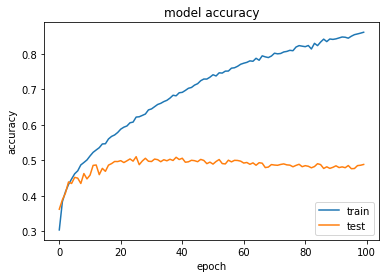

In [14]:

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

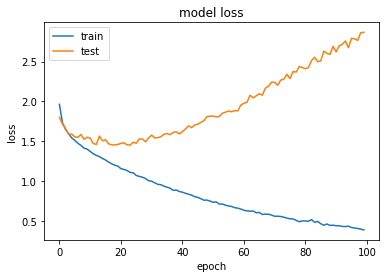

In [15]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
y_pred = classifier.predict(x_test)
y_pred

array([[1.3898157e-02, 1.9979980e-04, 9.9664430e-05, ..., 8.6558296e-04,
        1.7951903e-03, 7.9650868e-04],
       [9.4983168e-03, 3.4769699e-02, 6.2738036e-13, ..., 1.4878424e-08,
        1.9389617e-01, 7.6183575e-01],
       [8.7808752e-01, 1.5754610e-02, 3.2937401e-06, ..., 2.3406222e-03,
        9.5168445e-03, 9.4199225e-02],
       ...,
       [3.8980090e-11, 2.4352610e-16, 2.8467726e-08, ..., 2.0435296e-13,
        7.2056489e-10, 1.8618051e-13],
       [5.3183755e-15, 1.0932258e-15, 9.8203444e-01, ..., 8.2409324e-09,
        1.5715752e-15, 1.2843827e-09],
       [2.6124172e-04, 2.4191066e-04, 5.7516062e-01, ..., 1.8967040e-01,
        5.2873003e-03, 5.6515378e-03]], dtype=float32)

In [17]:
prediction_score = classifier.evaluate(x_test, y_test, verbose=0)


print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [2.8596739768981934, 0.4878999888896942]
